In [79]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

In [80]:
df = pd.read_csv('nyc-rolling-sales.csv')

print('Dataset is ready!')

Dataset is ready!


In [81]:
df.head() #menampilkan 5 data teratas

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [82]:
df.tail() #menampilkan 5 data terbawah

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


**<h1> Preprocessing <h1>**

---



In [83]:
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()
#mengubah isi kolom "BOROUGH" dari angka menjadi nama kota 

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [84]:
df.shape #melihat shape dari dataset yang digunakan

(84548, 22)

In [85]:
df.info() #melihat info isi dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [86]:
df.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [87]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [88]:
df.drop(["Unnamed: 0"], axis=1, inplace=True) #drop kolom yang tidak relevan

Mengubah tipe data yang ada pada dataset

In [89]:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 
               'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [90]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [91]:
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [93]:
df.isna().sum() #melihat apakah ada missing values didalam dataset

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [94]:
df["LAND SQUARE FEET"]=df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].median())
df["GROSS SQUARE FEET"]=df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].median())
# Mengisi missing values pada kolom "LAND SQUARE FEET" dan "GROSS SQUARE FEET" dengan nilai median dari masing-masing kolom

In [95]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [96]:
df.dropna(inplace=True) #menghapus baris yang memiliki missing values didalamnya

In [97]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [98]:
df.shape

(69987, 21)

In [99]:
sum(df.duplicated())

380

In [100]:
df.drop_duplicates(inplace=True)
df.shape

(69607, 21)

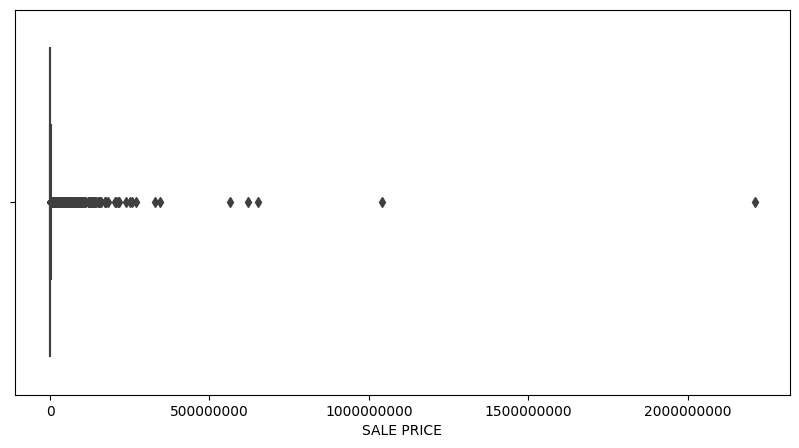

In [101]:
plt.figure(figsize=(10,5))
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [102]:
df= df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

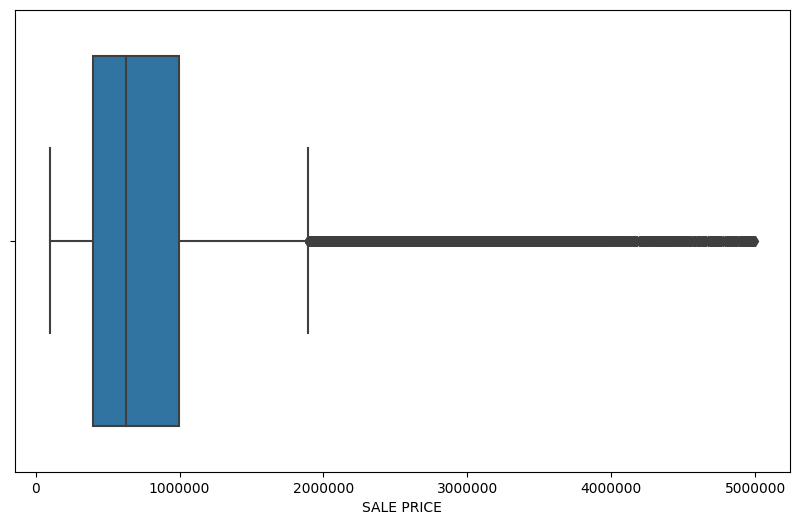

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

**<h1> Measure of Central Tendency <h1>**

---




<h1> Mean <h1>

In [104]:
print("Mean dari kolom 'SALE PRICE' = ", df['SALE PRICE'].mean())


Mean dari kolom 'SALE PRICE' =  867277.7485113322


In [105]:
#mean_sp = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
#mean_sp

<h1> Median <h1>

In [106]:
print("Median for the SALE PRICE = ",df['SALE PRICE'].median())
print("Median for the GROSS SQUARE FEET = ", df['GROSS SQUARE FEET'].median())
print("Median for the LAND SQUARE FEET = ", df['LAND SQUARE FEET'].median())

Median for the SALE PRICE =  630000.0
Median for the GROSS SQUARE FEET =  1680.0
Median for the LAND SQUARE FEET =  2325.0


In [107]:
median = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median

,SALE PRICE
BOROUGH,
Bronx,420000.0
Staten Island,474000.0
Queens,509000.0
Brooklyn,778105.5
Manhattan,999000.0


<h1> Modus <h1>

In [108]:
modus = df[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
modus

,BOROUGH,TOTAL UNITS
0,Bronx,1
1,Brooklyn,1
2,Manhattan,0
3,Queens,1
4,Staten Island,1


**<h1> Maesure of Spread <h1>**

---



<h1> Range <h1>

In [109]:
print('Range SALE PRICE = ', (df['SALE PRICE'].max() - df['SALE PRICE'].min()))

Range SALE PRICE =  4896506.0


<h1> Variance <h1>

In [110]:
print('Sampel Variance dari SALE PRICE = ', df['SALE PRICE'].var(ddof=1))

Sampel Variance dari SALE PRICE =  601702283290.1301


<h1> Standard Deviation <h1>

In [111]:
print('Sampel Standard Deviation dari SALE PRICE = ', df['SALE PRICE'].var(ddof=1)**0.5)

Sampel Standard Deviation dari SALE PRICE =  775694.7101083841


**<h1> Probability Distribution <h1>**

<ipython-input-112-8a36a2252809>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(br['SALE PRICE'],


[Text(0.5, 1.0, 'Distribution of Sale Price in Manhattan')]

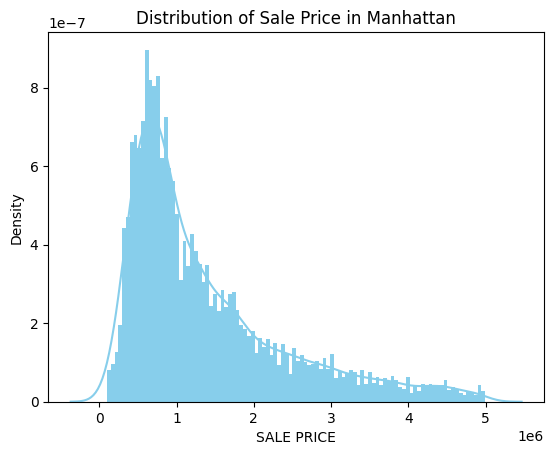

In [112]:
df1 = df.groupby("BOROUGH")
br = df1.get_group('Manhattan')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(title='Distribution of Sale Price in Manhattan')

**<h1> Confidence Interval <h1>**

In [113]:
CI = df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
CI

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          5.187303e+05  5.407409e+05   4562
Brooklyn       9.871040e+05  7.626947e+05  14518
Manhattan      1.383586e+06  1.031548e+06  12304
Queens         6.120277e+05  4.525458e+05  17503
Staten Island  5.098329e+05  2.890216e+05   5692

In [114]:
mean_tot = CI.iloc [2,0]  
sd = CI.iloc [2,1]
n = CI.iloc [2,2]         
z = 1.96  

In [115]:
se = sd / np.sqrt(n)

In [116]:
print('lower limit of CI: ',mean_tot - z* se)
print('upper limit of CI: ',mean_tot + z* se)

lower limit of CI:  1365358.4407589014
upper limit of CI:  1401813.0400603444


**<h1> Hypothesis Testing <h1>**

In [117]:
df_borough = df.groupby('BOROUGH', axis=0).sum()
df_borough

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Bronx,19592358,1370094,8550,398,8947,10882624.0,9701223.0,2.366448e+09
Brooklyn,61634384,5467058,22069,1182,23341,22044154.0,21859405.0,1.433078e+10
Manhattan,13889811,8786292,7405,256,7812,28786546.0,24214077.0,1.702364e+10
Queens,117912456,4145294,22481,3151,25747,56190605.0,37491916.0,1.071232e+10
Staten Island,18930033,1135385,7121,467,7584,28312042.0,12067643.0,2.901969e+09


In [120]:
Brooklyn = df[df['BOROUGH']=='Brooklyn']
Manhattan = df[df['BOROUGH']=='Manhattan']

In [126]:
total_unit_Brok = df_borough.iloc[1, 4]
mn_Brok = Brooklyn['SALE PRICE'].mean()
std_Brok = Brooklyn['SALE PRICE'].std()
total_unit_Brok, mn_Brok, std_Brok

(23341, 987104.0175644028, 762694.6590919107)

In [125]:
total_unit_Mht = df_borough.iloc[2, 4]
mu_Mht = Manhattan['SALE PRICE'].mean()
std_Mht = Manhattan['SALE PRICE'].std()
total_unit_Mht, mu_Mht, std_Mht

(7812, 1383585.740409623, 1031547.9567494899)

In [128]:
from statsmodels.stats.weightstats import ztest
ztest, pvalue= ztest(Manhattan['SALE PRICE'],Brooklyn['SALE PRICE'])
print("pvalue: ",float(pvalue))
if pvalue < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

pvalue:  1.7161688479956248e-285
reject null hypothesis


**<h1> Overall Analysis <h1>**

---

Karena nilai *p-value* yang didapat kurang dari alpha (0.05), maka bisa disimpulkan bahwa terdapat perbedaan yang cukup signifikan pada rata-rata harga per unit-nya antara wilayah Brooklyn dengan Manhattan
